In [1]:
from cnn import Turtlebot_CNN
from lstm import Turtlebot_LSTM
from read_data import make_dataset,split_data
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from inception import Inception
import os

batch_sizes=[1,10,50,75]
num_epochs=500

ds,l=make_dataset(path='FullData/')

[INFO]  Data folder FullData/NoNoise/29/auto_sending_goals_2021-06-29-11-11-28 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/4/auto_sending_goals_2021-06-29-10-24-08 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/42/auto_sending_goals_2021-06-30-10-04-03 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/25/auto_sending_goals_2021-06-29-11-02-26 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/19/auto_sending_goals_2021-06-29-10-48-52 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/10/auto_sending_goals_2021-06-29-10-30-24 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/33/auto_sending_goals_2021-06-30-09-54-36 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/8/auto_sending_goals_2021-06-29-10-29-36 already exists. Not creating.
[INFO]  Data folder FullData/NoNoise/40/auto_sending_goals_2021-06-30-10-03-16 already exists. Not creating.
[INFO]  Data folder F

In [2]:
train,test,validation=split_data(ds,l,batch_train=batch_size,prop_train_val=0.8,prop_train=0.8)

In [3]:
pred_ds,l_pred=make_dataset(path='Pred_data/12',with_label=False)

[INFO]  Data folder Pred_data/12/auto_sending_goals_2021-06-29-10-33-03 already exists. Not creating.


In [4]:
inc_scores=[]
for batch_size in batch_sizes:
    inc=Inception()
    cb_list_inc=[tf.keras.callbacks.ModelCheckpoint('inc_model/checkpoint_inc_batch{}_epochs{}.h5'.format(batch_size,num_epochs),monitor='val_loss',save_weight_only=True,save_best_only=True)]#tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50),
    inc.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
    hist_inc=inc.fit(train,epochs=num_epochs,callbacks=cb_list_inc,verbose=1,validation_data=validation)
    inc_scores.append(inc.evaluate(test)[0])
plt.figure()
plt.plot(batch_sizes,inc_scores)
plt.show()

Epoch 1/10
115/115 [==============================] - 32s 249ms/step - loss: 1.1474 - categorical_accuracy: 0.3967 - val_loss: 15.5814 - val_categorical_accuracy: 0.3130
Epoch 2/10
115/115 [==============================] - 30s 258ms/step - loss: 1.0585 - categorical_accuracy: 0.3673 - val_loss: 7.1472 - val_categorical_accuracy: 0.4261
Epoch 3/10
115/115 [==============================] - 28s 246ms/step - loss: 1.0016 - categorical_accuracy: 0.5103 - val_loss: 15.7447 - val_categorical_accuracy: 0.3739
Epoch 4/10
115/115 [==============================] - 28s 240ms/step - loss: 0.9820 - categorical_accuracy: 0.5101 - val_loss: 19.3574 - val_categorical_accuracy: 0.4609
Epoch 5/10
115/115 [==============================] - 27s 231ms/step - loss: 0.9345 - categorical_accuracy: 0.6193 - val_loss: 11.8300 - val_categorical_accuracy: 0.3217
Epoch 6/10
115/115 [==============================] - 26s 227ms/step - loss: 0.8594 - categorical_accuracy: 0.6335 - val_loss: 11.0092 - val_categorica

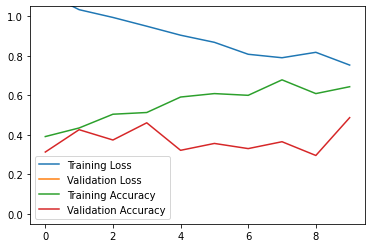

29/29 [==============================] - 1s 36ms/step - loss: 7.2220 - categorical_accuracy: 0.5172


[7.222022533416748, 0.517241358757019]

In [5]:
inc.load_weights('/home/louis/model_cnn/inc_model/checkpoint_inc_batch{}_epochs{}.h5'.format(batch_size,num_epochs))
plt.figure()
plt.plot(hist_inc.history['loss'],label='Training Loss')
plt.plot(hist_inc.history['val_loss'],label='Validation Loss')
plt.plot(hist_inc.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_inc.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.ylim(-0.05,1.05)
plt.show()
inc.evaluate(test)

In [6]:

lstm_scores=[]
for batch_size in batch_sizes:
    lstm=Turtlebot_LSTM()
    cb_list_lstm=[tf.keras.callbacks.ModelCheckpoint('lstm_model/checkpoint_lstm_batch{}_epochs{}'.format(batch_size,num_epochs),monitor='val_loss',save_best_only=True,save_weights_only=True)]#tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50),
    lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
    hist_lstm=lstm.fit(train,epochs=num_epochs,callbacks=cb_list_lstm,verbose=1,validation_data=validation)
    lstm_scores.append(lstm.evaluate(test)[0])
plt.figure()
plt.plot(batch_sizes,lstm_scores)
plt.show()

Epoch 1/10
115/115 [==============================] - 67s 572ms/step - loss: 1.0614 - categorical_accuracy: 0.5435 - val_loss: 0.9967 - val_categorical_accuracy: 0.5130
Epoch 2/10
115/115 [==============================] - 68s 595ms/step - loss: 0.9984 - categorical_accuracy: 0.5597 - val_loss: 0.8752 - val_categorical_accuracy: 0.6087
Epoch 3/10
112/115 [============================>.] - ETA: 1s - loss: 1.0720 - categorical_accuracy: 0.4491

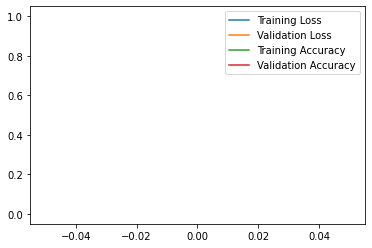

29/29 [==============================] - 2s 82ms/step - loss: 1.0046 - categorical_accuracy: 0.3448


[1.0045939683914185, 0.3448275923728943]

In [ ]:
lstm.load_weights('lstm_model/checkpoint_lstm_batch{}_epochs{}'.format(batch_size,num_epochs))
plt.figure()
plt.plot(hist_lstm.history['loss'],label='Training Loss')
plt.plot(hist_lstm.history['val_loss'],label='Validation Loss')
plt.plot(hist_lstm.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_lstm.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.ylim(-0.05,1.05)
plt.show()
lstm.evaluate(test)

In [ ]:
cnn_scores=[]
for batch_size in batch_sizes:
    cnn=Turtlebot_CNN()
    cb_list_cnn=[tf.keras.callbacks.ModelCheckpoint('cnn_model/checkpoint_cnn_batch{}_epochs{}'.format(batch_size,num_epochs),monitor='val_loss',save_best_only=True,save_weights_only=True)]#,tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)]
    cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
    hist_cnn=cnn.fit(train,epochs=num_epochs,callbacks=cb_list_cnn,verbose=1,validation_data=validation)
    cnn_scores.append(cnn.evaluate(test)[0])

115/115 [==============================] - 4s 27ms/step - loss: 1.0987 - categorical_accuracy: 0.4623 - val_loss: 0.9687 - val_categorical_accuracy: 0.5217
Model: "turtlebot_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          multiple                  0         
_________________________________________________________________
masking_3 (Masking)          multiple                  0         
_________________________________________________________________
conv1d_64 (Conv1D)           multiple                  8320      
_________________________________________________________________
conv1d_65 (Conv1D)           multiple                  20480     
_________________________________________________________________
conv1d_66 (Conv1D)           multiple                  460800    
_________________________________________________________________
conv1d_67 (Conv1D)           

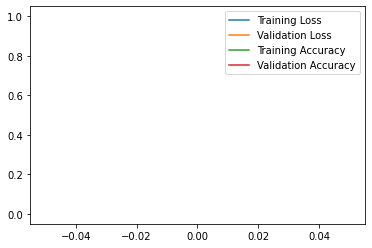

29/29 [==============================] - 0s 5ms/step - loss: 1.0110 - categorical_accuracy: 0.3448


[1.0110050439834595, 0.3448275923728943]

In [ ]:
cnn.load_weights('cnn_model/checkpoint_cnn_batch{}_epochs{}'.format(batch_size,num_epochs))

plt.figure()
plt.plot(hist_cnn.history['loss'],label='Training Loss')
plt.plot(hist_cnn.history['val_loss'],label='Validation Loss')
plt.plot(hist_cnn.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_cnn.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.ylim(-0.05,1.05)
plt.show()
cnn.evaluate(test)